In [25]:
# importing all Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
dfData=pd.read_csv('Churn_Modelling.csv')#importing dataset
dfData.head()#display 1st 5 data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
dfData.tail()#dispaly last 5 data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [28]:
dfData.shape #shape of data frame i.e no.of rows and no. of columns

(10000, 14)

In [29]:
print(dfData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [30]:
dfData.isnull().sum() # this means no null value is there

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
dfData.describe() # display all the statistics of dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
dfData.columns # get all columns name

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
dfData=dfData.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1) # dropping all irrelevant columns

In [34]:
dfData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
# Encoding Categorical Data bcoz ML models work best with numerical values 
dfData['Geography'].unique() # Fpr Example printing all unique values in geography column for encoding

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
dfData=pd.get_dummies(dfData,drop_first=True) # converting the categorical data into binary vector using dummy variables
dfData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [37]:
dfData['Exited'].value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

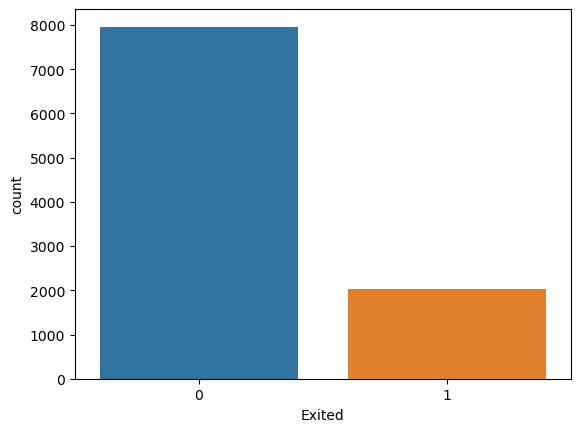

In [39]:
sns.countplot(x=dfData['Exited']) # Visulaising the value count of Exited column
# after visualising there is a large imbalance in the target class..uneven distribution

In [40]:
# Separating independent and dependent variables into x and y
X=dfData.drop('Exited',axis=1) # independent variable
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88                  0              

In [41]:
Y=dfData['Exited'] #dependent variable
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Splitting the data set into training and testing
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y,test_size=0.20,random_state=42)

### Handling Imbalanced data

In [15]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [52]:
# OverSampling using SMOTE
from imblearn.over_sampling import SMOTE

In [53]:
X_res,Y_res = SMOTE().fit_resample(X,Y) # resampling the data

In [54]:
Y_res.value_counts() # now checking the value counts ..now it is balanced

1    7963
0    7963
Name: Exited, dtype: int64

In [19]:
# from sklearn.model_selection import train_test_split

In [55]:
#Splitting the data set into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler() # instance created

In [67]:
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [68]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train

array([[-0.47219382, -0.59061239,  0.80748482, ...,  1.75370917,
        -0.46213038, -0.84292723],
       [ 1.09996309,  0.11372177, -1.39813033, ..., -0.57021998,
        -0.46213038,  1.18634203],
       [ 0.08461175, -0.69123156,  0.80748482, ..., -0.57021998,
        -0.46213038, -0.84292723],
       ...,
       [ 0.20470707,  0.21434094,  1.17508735, ..., -0.57021998,
        -0.46213038,  1.18634203],
       [ 1.31831822,  0.6168176 , -0.66292528, ..., -0.57021998,
        -0.46213038,  1.18634203],
       [ 0.53223976,  1.01929427, -1.39813033, ...,  1.75370917,
        -0.46213038,  1.18634203]])

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression # library imported for model training

In [47]:
log=LogisticRegression() # instance created

In [70]:
log.fit(X1_train,Y1_train) # TRAINING MODEL BEFORE BALANCING DATA

LogisticRegression()

In [71]:
y1_pred1=log.predict(X1_test)

In [72]:
log.fit(X_train,Y_train) # fitting or training the model of independent and dependent variables after balancing

LogisticRegression()

In [73]:
y_pred1=log.predict(X_test) # predicting values using model trained

In [50]:
from sklearn.metrics import accuracy_score 

In [74]:
accuracy_score(Y1_test,y1_pred1) # analysing the models accuracy

0.811

In [75]:
accuracy_score(Y_test,y_pred1) # THIS IS AFTER HANDLING THE IMBALANCE IN DATA USING SMOTE

0.7827997489014438

In [62]:
# As dataset is imbalanced checking other metrics as well
from sklearn.metrics import precision_score,recall_score,f1_score

In [76]:
precision_score(Y1_test,y1_pred1)# THIS IS BEFORE HANDLING THE IMBALANCE IN DATA USING SMOTE

0.5524475524475524

In [77]:
precision_score(Y_test,y_pred1) # THIS IS AFTER HANDLING THE IMBALANCE IN DATA USING SMOTE

0.7675574891236793

In [78]:
recall_score(Y1_test,y1_pred1) #Before balancing data

0.2010178117048346

In [79]:
recall_score(Y_test,y_pred1)# THIS IS AFTER HANDLING THE IMBALANCE IN DATA USING SMOTE

0.7952350289761752

In [80]:
f1_score(Y1_test,y1_pred1)# Before balancing data

0.2947761194029851

In [81]:
f1_score(Y_test,y_pred1)# THIS IS AFTER HANDLING THE IMBALANCE IN DATA USING SMOTE

0.7811511701454775

#### Now after balancing dataset using models on balanced data only

### SVC

In [82]:
from sklearn import svm

In [83]:
svm=svm.SVC()

In [84]:
svm.fit(X_train,Y_train)

SVC()

In [85]:
Y_pred=svm.predict(X_test)

In [86]:
accuracy_score(Y_test,Y_pred)

0.837413684871312

In [87]:
precision_score(Y_test,Y_pred)

0.8302488832163369

In [88]:
recall_score(Y_test,Y_pred)

0.8377334191886671

In [89]:
f1_score(Y_test,Y_pred)

0.833974358974359

### KNeighbours Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn=KNeighborsClassifier()

In [92]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [93]:
Y_pred3=knn.predict(X_test)

In [94]:
accuracy_score(Y_test,Y_pred3)

0.8101067168863779

In [95]:
precision_score(Y_test,Y_pred3)

0.7915129151291513

In [96]:
recall_score(Y_test,Y_pred3)

0.8287186091435931

In [97]:
f1_score(Y_test,Y_pred3)

0.8096885813148789

### Decision tree classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt=DecisionTreeClassifier()

In [100]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [101]:
Y_pred4=dt.predict(X_test)

In [102]:
accuracy_score(Y_test,Y_pred4)

0.7937853107344632

In [103]:
precision_score(Y_test,Y_pred4)

0.7745098039215687

In [104]:
recall_score(Y_test,Y_pred4)

0.8139085640695428

In [105]:
f1_score(Y_test,Y_pred4)

0.7937205651491366

### RandomForestClassifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf=RandomForestClassifier()

In [108]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [109]:
Y_pred5=rf.predict(X_test)

In [110]:
accuracy_score(Y_test,Y_pred5)

0.8615819209039548

In [111]:
precision_score(Y_test,Y_pred5)

0.8545918367346939

In [112]:
recall_score(Y_test,Y_pred5)

0.8628461043142305

In [113]:
f1_score(Y_test,Y_pred5)

0.8586991348926626

### GradientBoostingClassifier

In [114]:
from sklearn.ensemble import  GradientBoostingClassifier

In [115]:
gb=GradientBoostingClassifier()

In [116]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [117]:
Y_pred6=gb.predict(X_test)

In [118]:
accuracy_score(Y_test,Y_pred6)

0.8402385436283741

In [119]:
precision_score(Y_test,Y_pred6)

0.8350449293966624

In [120]:
recall_score(Y_test,Y_pred6)

0.8377334191886671

In [121]:
f1_score(Y_test,Y_pred6)

0.8363870138219223

In [122]:
# Storing all performance metric of different models in one df for analyzing which is best
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DTREE','RFOREST','GBC'],
                        'Accuracy':[accuracy_score(Y_test,y_pred1),
                                   accuracy_score(Y_test,Y_pred),
                                   accuracy_score(Y_test,Y_pred3),
                                   accuracy_score(Y_test,Y_pred4),
                                   accuracy_score(Y_test,Y_pred5),
                                   accuracy_score(Y_test,Y_pred6)],
                        'Precision':[precision_score(Y_test,y_pred1),
                                   precision_score(Y_test,Y_pred),
                                   precision_score(Y_test,Y_pred3),
                                   precision_score(Y_test,Y_pred4),
                                   precision_score(Y_test,Y_pred5),
                                   precision_score(Y_test,Y_pred6)],
                        'Recall':[recall_score(Y_test,y_pred1),
                                   recall_score(Y_test,Y_pred),
                                   recall_score(Y_test,Y_pred3),
                                   recall_score(Y_test,Y_pred4),
                                   recall_score(Y_test,Y_pred5),
                                   recall_score(Y_test,Y_pred6)],
                        'F1 Score':[f1_score(Y_test,y_pred1),
                                   f1_score(Y_test,Y_pred),
                                   f1_score(Y_test,Y_pred3),
                                   f1_score(Y_test,Y_pred4),
                                   f1_score(Y_test,Y_pred5),
                                   f1_score(Y_test,Y_pred6)]})

In [123]:
final_data

,Models,Accuracy,Precision,Recall,F1 Score
0,LR,0.782800,0.767557,0.795235,0.781151
1,SVC,0.837414,0.830249,0.837733,0.833974
2,KNN,0.810107,0.791513,0.828719,0.809689
3,DTREE,0.793785,0.774510,0.813909,0.793721
4,RFOREST,0.861582,0.854592,0.862846,0.858699
5,GBC,0.840239,0.835045,0.837733,0.836387


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

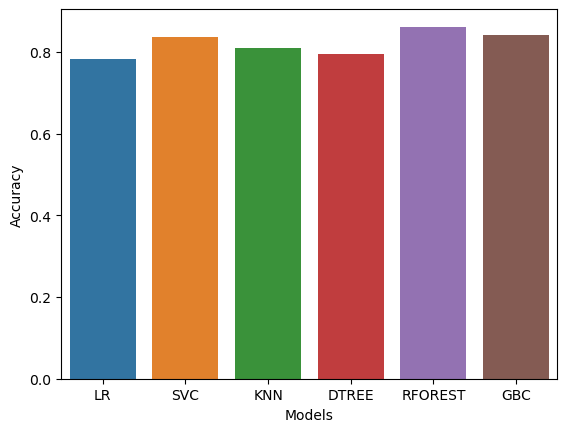

In [124]:
# Visualizing the model vs accuracy through graph
sns.barplot(final_data['Models'],final_data['Accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Precision'>

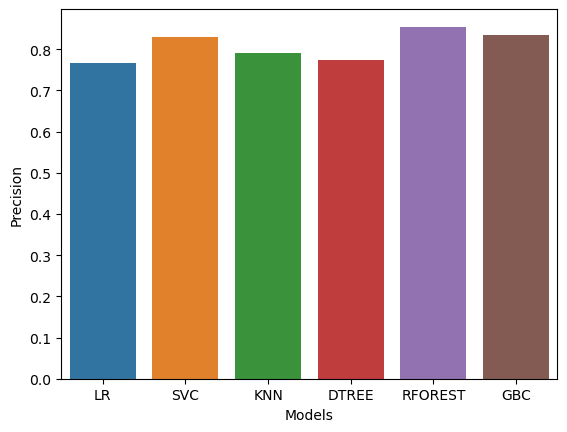

In [125]:
# Visualizing the model vs precision through graph
sns.barplot(final_data['Models'],final_data['Precision'])

### Save the model

In [126]:
# Doing feature scaling on balanced data i.e. X_res 
X_res = sc.fit_transform(X_res)

In [127]:
# training our best model which works i.e Random Forest on complete balanced data set
rf.fit(X_res,Y_res)

RandomForestClassifier()

In [128]:
import joblib # library for saving the model

In [129]:
joblib.dump(rf,'churn_predict_model') # saving the model and giving it a name

['churn_predict_model']

In [130]:
model=joblib.load('churn_predict_model') # loading the model for using further

In [131]:
dfData.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [142]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]]) # predicting on different values

array([1], dtype=int64)

In [143]:
model.predict([[619,42,2,0.0,1,1,1,101348.88,0,0,0]])

array([0], dtype=int64)

In [144]:
model.predict([[502,42,8,159660.8,3,1,0,113931.57,0,0,0]])

array([1], dtype=int64)

In [145]:
model.predict([[608,41,1,83807.86,1,0,1,112542.58,0,1,0]])

array([0], dtype=int64)

In [137]:
model.predict([[772,42,3,75075.31,2,1,0,92888.52,1,0,1]])

array([1], dtype=int64)

In [150]:
model.predict([[709,36,7,0.00,1,0,1,42085.58,0,0,0]])

array([0], dtype=int64)

### GUI

In [139]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib 

In [166]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9==1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9==2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9==3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    
    
    #model=joblib.load('churn_predict_model')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]])
    if result ==0:
        Label(master,text="NO EXIT").grid(row=31)
    elif result ==1:
        Label(master,text="EXIT").grid(row=31)

master =Tk()
master.title("Customer Churn Prediction")
label= Label(master,text="Customer Churn Prediction",
            bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text="Credit Score").grid(row=1)
Label(master,text="Age").grid(row=2)
Label(master,text="Tenure").grid(row=3)
Label(master,text="Balance").grid(row=4)
Label(master,text="NumOfProducts").grid(row=5)
Label(master,text="HasCrCard").grid(row=6)
Label(master,text="IsActiveMember").grid(row=7)
Label(master,text="EstimatedSalry").grid(row=8)
Label(master,text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)

Button(master,text='Predict',command=show_entry_fields).grid()
mainloop()